In [1]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mercury as mr

import datetime as dt
import re
from string import punctuation as punct
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
df = pd.read_csv("gsearch_jobs.csv")
df = df.drop(columns=["Unnamed: 0", "index"])

# Format lists
remove_punct = lambda x: x.translate(str.maketrans('', '', punct)).split()
df.extensions = df.extensions.apply(remove_punct)
df.description_tokens = df.description_tokens.apply(remove_punct)

# Format dates
df.date_time = pd.to_datetime(df.date_time)
df.insert(14, "time_ago", df.date_time.apply(lambda x: dt.datetime.today() - x))

In [3]:
# Data cleaning

In [4]:
# słowa kluczowe dla kategorii
junior_keywords = ['junior', 'entry level', 'intern', 'apprentice','jr','I']
mid_keywords = ['mid-level', 'mid level', 'midlevel','mid', 'II','consultant', 'intermediate', 'experienced','associate','practitioner']
senior_keywords = ['senior', 'lead', 'principal', 'sr', 'III', 'IV', 'senior level','advanced','senior associate', 'expert']

In [5]:
# function to assign an offer to a category
def categorize_job(row):
    title = row['title'].lower()
    description = row['description'].lower()
    for keyword in junior_keywords:
        if keyword in title or keyword in description:
            return 'Junior'
    for keyword in mid_keywords:
        if keyword in title or keyword in description:
            return 'Mid'
    for keyword in senior_keywords:
        if keyword in title or keyword in description:
            return 'Senior'
    return 'unknown'

# add column 
df['category'] = df.apply(categorize_job, axis=1)

In [6]:
df = df.drop(df[df['category'] == 'unknown'].index)

In [7]:
keywords_programming = {
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql', 
}

keywords_libraries = {
'scikit-learn', 'jupyter', 'theano', 'openCV', 'spark', 'nltk', 'mlpack', 'chainer', 'fann', 'shogun', 
'dlib', 'mxnet', 'node.js', 'vue', 'vue.js', 'keras', 'ember.js', 'jse/jee',
}

keywords_analyst_tools = {
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot','aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora'
}

keywords = keywords_programming.union(keywords_libraries).union(keywords_analyst_tools)

In [8]:
#Drop rows with null descriptions
jobs_all = df.dropna(subset=['description']).reset_index()

In [9]:
keyword_counts = Counter()
for description in jobs_all['description']:
    words = description.lower().split()
    keyword_counts.update(set(words).intersection(keywords))

In [10]:
# sort the keywords by frequency in descending order
sorted_counts = keyword_counts.most_common()

In [11]:
# extract the 10 most common keywords
top_keywords = sorted_counts[:10]

In [12]:
skills = []

for val in df.description_tokens.values:
    skills.extend(val)
skills, counts = np.unique(skills, return_counts=True)
skill_count = sorted(zip(list(skills), list(counts)), key=lambda x: -x[1])
skills = list(map(lambda x: x[0], skill_count))
counts = list(map(lambda x: x[1], skill_count))
salaries = []
for skill in skills: 
    salaries.append(df[df.description_tokens.apply(lambda x: skill in x)].salary_standardized.fillna(0).mean())
skills_df = pd.DataFrame({"skill": list(skills), "number_of_postings": counts, "avg_salary": map(round, salaries)})
skills_df = skills_df.sort_values("avg_salary", ascending=False)


In [13]:
#percent_missing = df.isna().sum() * 100 / len(df)
#print(f"Percentage of missing data:\n{percent_missing}")

# Analytical Skills 📊
Nowadays, it is becoming increasingly difficult to find a first job as a data analyst. Therefore, we have prepared an analysis of the most useful skills to help you land your dream job. Here, you will find information on: 

## What you will finde here:

- Number of jobs depending on experience level
- What company is looking for the most employees
- Where company is looking for the most employees
- Where you can finde the most offert in internet
- What are the working hours
- How many offers have remote work
- Salaries for 10 most popular skills
- Most needed skills

### About data
- There are exactly 15963 job advertisements from the Internet in this datasethc. 
- The dataset is missing 80% of sallara information we can assume that most is due to price negotiations.
- Employers offer remote work in more than 40% of job listings. 
- The sites with the most job listings are Linkedin,Upwork,Ziprecruiter.

In [14]:
show_code = mr.Checkbox(label="Show code", value=False)

mercury.Checkbox

In [15]:
app = mr.App(title="JOB-Market",description="Hello Mercury", show_code=show_code.value)

mercury.App

In [16]:
lvl = mr.MultiSelect(value=['Junior','Mid','Senior'],choices=['Junior','Mid','Senior'], label="Choose youre level")

mercury.MultiSelect

In [17]:
df_lvl = df[df.category.isin(lvl.value)]

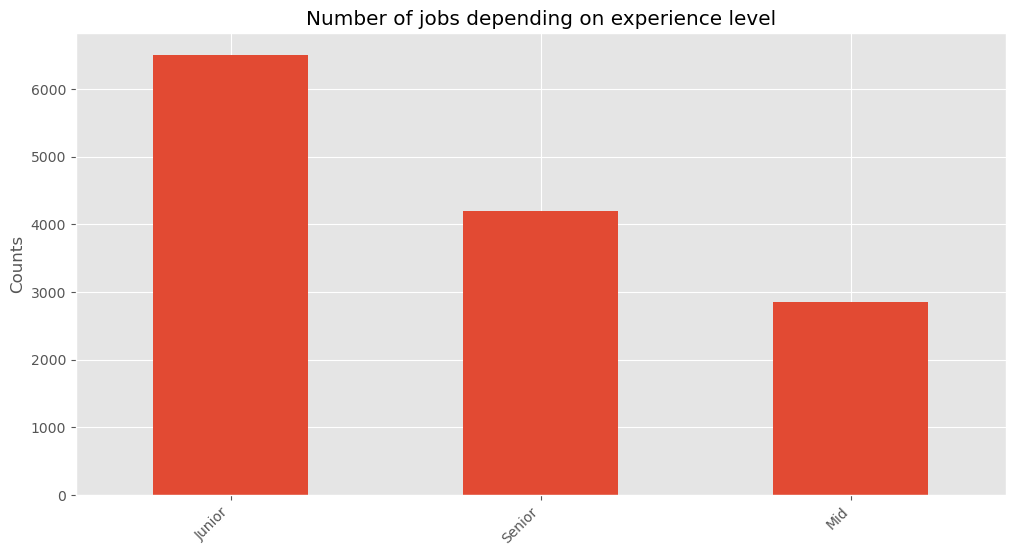

In [18]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')

level = df_lvl['category'].value_counts().nlargest(10).sort_values(ascending=False)
level.plot(kind='bar')

plt.title("Number of jobs depending on experience level")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

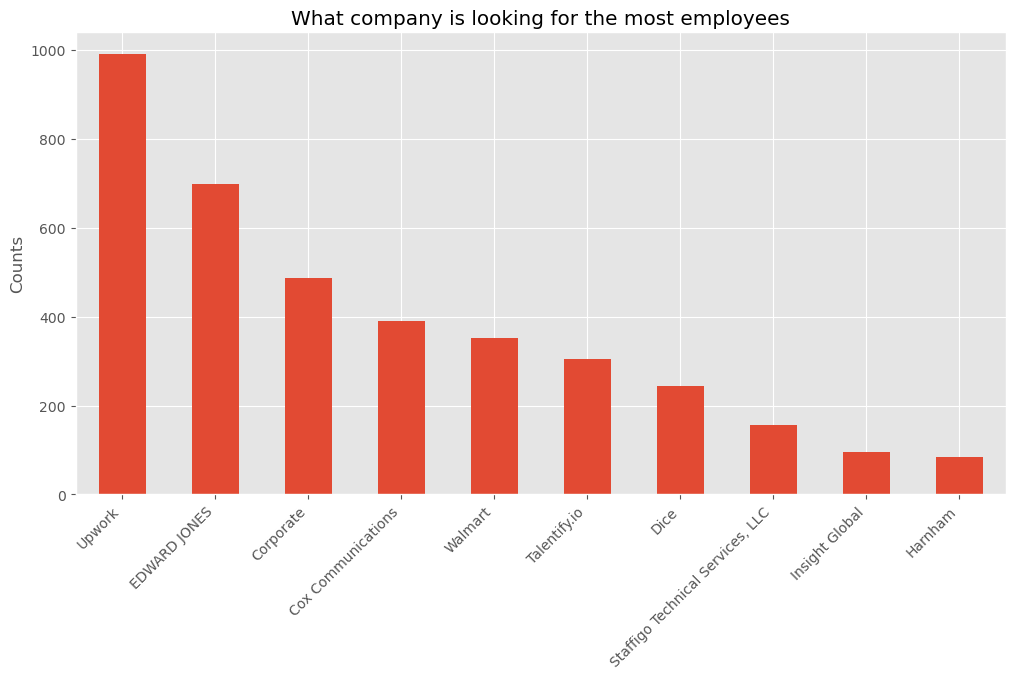

In [19]:
plt.figure(figsize=(12,6))
counts = df['company_name'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title("What company is looking for the most employees")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

## Where to look?

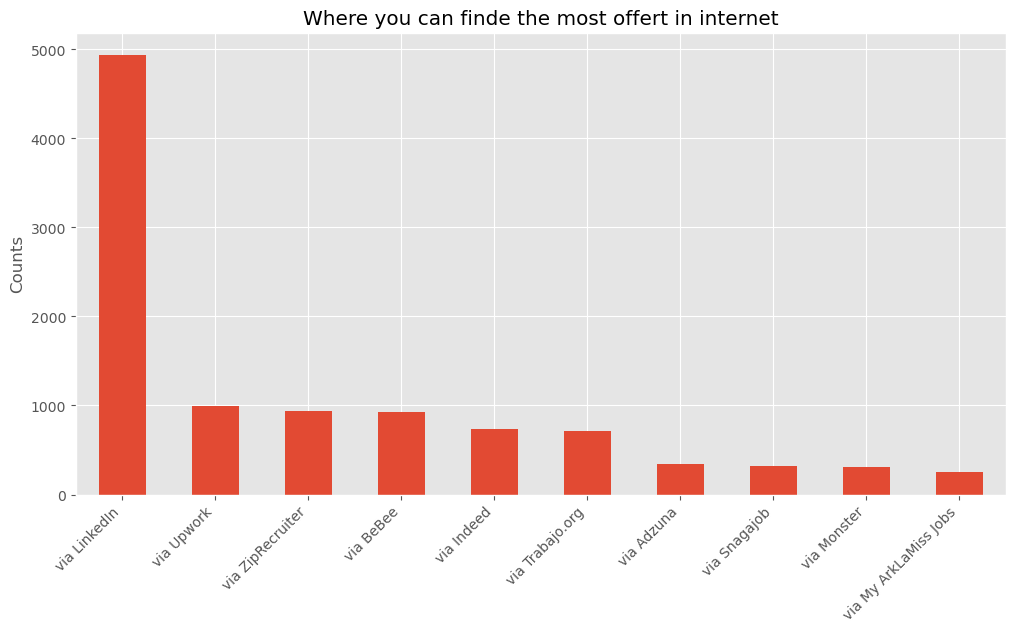

In [20]:
plt.figure(figsize=(12,6))
counts = df['via'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title("Where you can finde the most offert in internet")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

## Work type

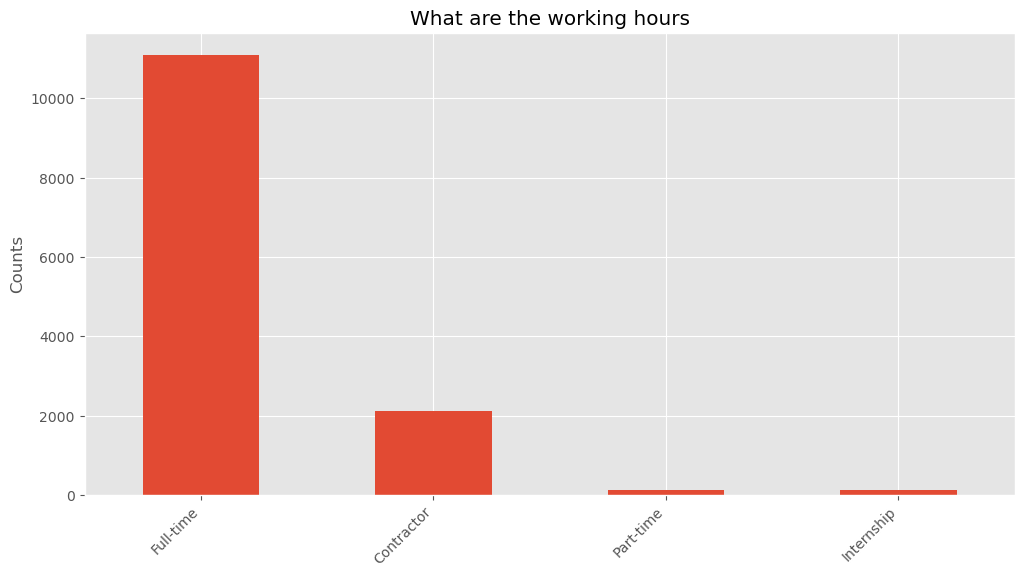

In [21]:
plt.figure(figsize=(12,6))
counts = df['schedule_type'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title("What are the working hours")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

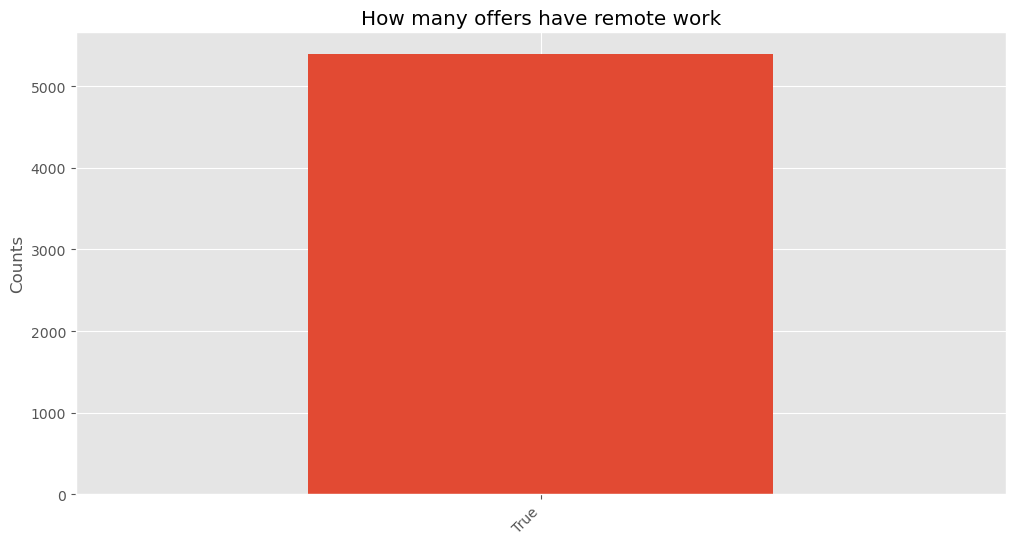

In [22]:
plt.figure(figsize=(12,6))
counts = df['work_from_home'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title("How many offers have remote work")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

## Skills & payments

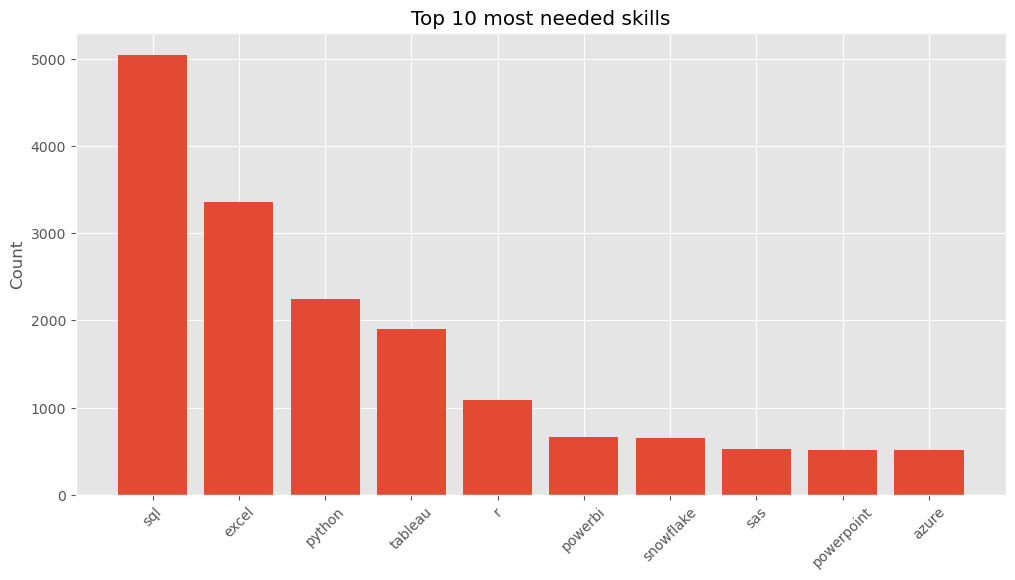

In [23]:
plt.figure(figsize=(12,6))
plt.bar(range(len(top_keywords)), [x[1] for x in top_keywords])
plt.xticks(range(len(top_keywords)), [x[0] for x in top_keywords], rotation=45)

plt.title('Top 10 most needed skills')
plt.ylabel('Count')
plt.show()

In [24]:
keyword = keywords_programming.union(keywords_libraries).union(keywords_analyst_tools)

In [29]:
sk_set = mr.MultiSelect(choices=keyword, label="Choose your skills",
                        value=['sql', 'python', 'r', 'snowflake','excel','powerbi','sas','azure','linux', 'tableau'])

mercury.MultiSelect

In [26]:
sk_df = skills_df[skills_df.skill.isin(sk_set.value)]

<Figure size 640x480 with 0 Axes>

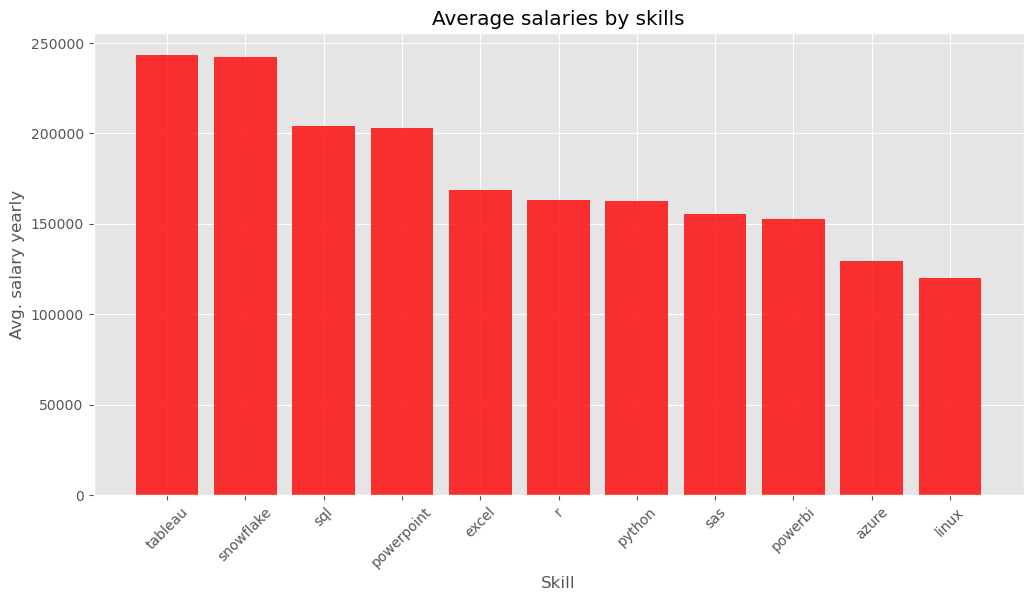

In [28]:
plt.figure()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(sk_df['skill'], sk_df['avg_salary']*12, color='red', alpha=0.8)

ax.set_xlabel('Skill')
ax.set_ylabel('Avg. salary yearly')
ax.set_title('Average salaries by skills')
plt.xticks(rotation=45);
plt.show()